In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats.mstats import winsorize
from imblearn.combine import SMOTETomek

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3637,70268,Male,82.0,0,0,Yes,Private,Urban,226.84,25.3,formerly smoked,0
3150,69979,Male,73.0,0,0,Yes,Self-employed,Rural,231.43,23.0,smokes,0
185,41081,Male,63.0,0,0,Yes,Private,Rural,137.30,31.7,formerly smoked,1
1172,30411,Female,40.0,0,0,No,Private,Rural,117.45,30.7,smokes,0
774,41033,Female,31.0,0,0,Yes,Govt_job,Rural,55.27,32.5,formerly smoked,0


In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.replace('Male',0, inplace = True)
df.replace('Female',1, inplace = True)
df.replace('Other',2, inplace = True)

In [10]:
#Data Preprocessing
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [12]:
print_unique_col_values(df)

ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [14]:
df.replace('Yes',1, inplace = True)
df.replace('No',0 , inplace = True)

In [16]:
print_unique_col_values(df)

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [18]:
df.replace('Urban',1, inplace = True)
df.replace('Rural',0, inplace = True)

In [20]:
print_unique_col_values(df)

work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [22]:
df = pd.get_dummies(data=df, columns=['work_type','smoking_status'])

In [24]:
df.isnull().sum()

id                                  0
gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [26]:
# delete id col => มันไม่จำเป็นต้องใช้
df = df.drop('id', axis=1)

In [28]:
bmi_missing_values = df['bmi'].isna().value_counts()
bmi_missing_values
print(f'{round(bmi_missing_values[1]/(bmi_missing_values[0] + bmi_missing_values[1])*100,3)} % of bmi data is missing')

3.933 % of bmi data is missing


9.099999999999998
47.5
21      48.9
113     56.6
254     50.1
258     54.6
270     60.9
        ... 
4858    47.6
4906    54.1
4952    56.6
5009    49.5
5057    47.6
Name: bmi, Length: 110, dtype: float64
bmi has 110 outliers 


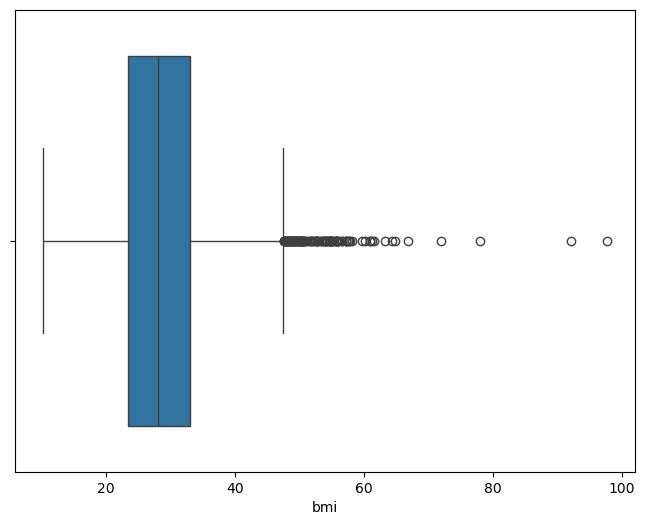

In [30]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_bmi = df[(df['bmi']<lower_bound) | (df['bmi']>upper_bound)]
if Outliers_bmi.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ bmi")
else:
    print(Outliers_bmi['bmi'])
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("bmi doesn't have outliers") if len(outliers)==0 else print(f"bmi has {len(outliers)} outliers ")

In [32]:
# do fill null in bmi with median value
median = df.bmi.median()
df['bmi'] = df['bmi'].fillna(median)

<Axes: xlabel='bmi', ylabel='Count'>

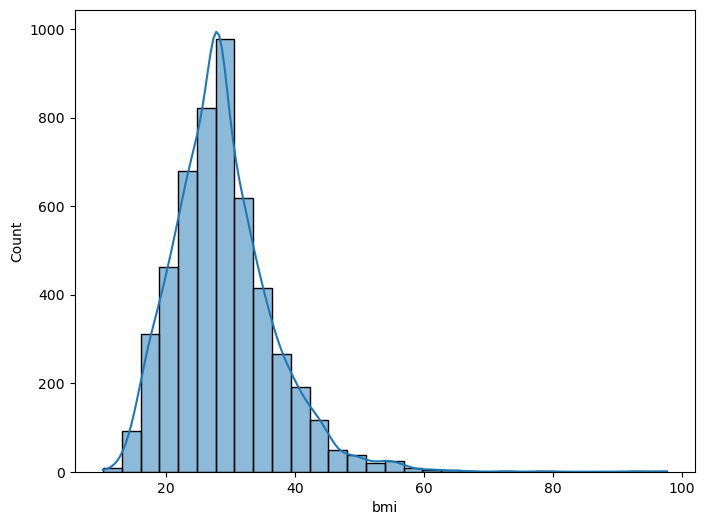

In [34]:
# สร้างฮิสโตแกรม
plt.figure(figsize=(8,6))
sns.histplot(df.bmi, bins=30, kde=True) 

In [35]:
df.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [40]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,False
1,1,61.0,0,0,1,0,202.21,28.1,1,False,False,False,True,False,False,False,True,False
2,0,80.0,0,1,1,0,105.92,32.5,1,False,False,True,False,False,False,False,True,False
3,1,49.0,0,0,1,1,171.23,34.4,1,False,False,True,False,False,False,False,False,True
4,1,79.0,1,0,1,0,174.12,24.0,1,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,1,83.75,28.1,0,False,False,True,False,False,False,False,True,False
5106,1,81.0,0,0,1,1,125.20,40.0,0,False,False,False,True,False,False,False,True,False
5107,1,35.0,0,0,1,0,82.99,30.6,0,False,False,False,True,False,False,False,True,False
5108,0,51.0,0,0,1,0,166.29,25.6,0,False,False,True,False,False,False,True,False,False


In [42]:
# ทำการ Winsorisation
Outliers_cleansing = winsorize(df['bmi'], limits = (0.05, 0.05))
replace_value = pd.DataFrame({
    'Original': df.loc[Outliers_bmi.index, 'bmi'],
    'Winsorized': Outliers_cleansing[Outliers_bmi.index]
})
print(replace_value)

df['bmi'] = Outliers_cleansing

      Original  Winsorized
21        48.9        42.7
113       56.6        42.7
254       50.1        42.7
258       54.6        42.7
270       60.9        42.7
...        ...         ...
4858      47.6        42.7
4906      54.1        42.7
4952      56.6        42.7
5009      49.5        42.7
5057      47.6        42.7

[110 rows x 2 columns]


bmi doesn't have outliers


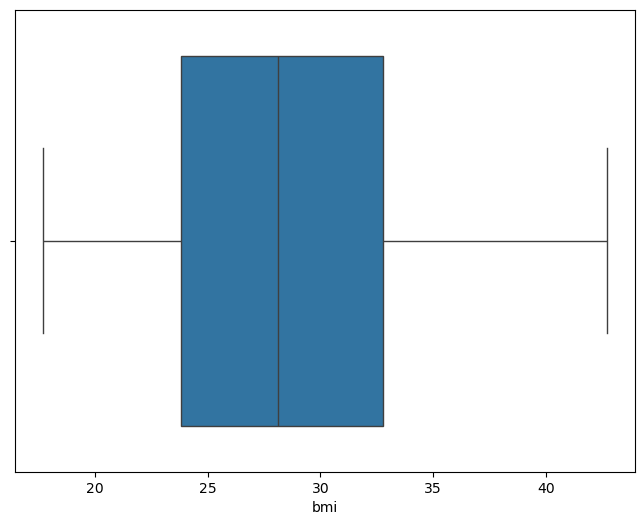

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("bmi doesn't have outliers") if len(outliers)==0 else print(f"bmi has {len(outliers)} outliers ")

21.977500000000006
169.35750000000002
21      233.29
113     224.10
254     210.95
258     205.84
270     129.54
         ...  
4858    100.88
4906     70.51
4952    211.83
5009    126.85
5057     69.92
Name: avg_glucose_level, Length: 110, dtype: float64
avg_glucose_level has 874 outliers 


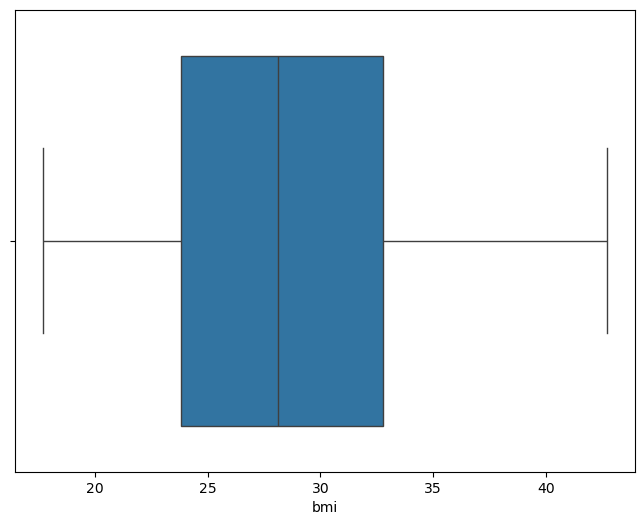

In [46]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_avg_glucose_level = df[(df['avg_glucose_level']<lower_bound) | (df['avg_glucose_level']>upper_bound)]
if Outliers_avg_glucose_level.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ avg_glucose_level")
else:
    print(Outliers_bmi['avg_glucose_level'])
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("avg_glucose_level doesn't have outliers") if len(outliers)==0 else print(f"avg_glucose_level has {len(outliers)} outliers ")

In [48]:
# ทำการ Winsorisation
Outliers_cleansing = winsorize(df['avg_glucose_level'], limits = (0.05, 0.05))
replace_value = pd.DataFrame({
    'Original': df.loc[Outliers_bmi.index, 'avg_glucose_level'],
    'Winsorized': Outliers_cleansing[Outliers_bmi.index]
})
print(replace_value)

df['avg_glucose_level'] = Outliers_cleansing

      Original  Winsorized
21      233.29      216.38
113     224.10      216.38
254     210.95      210.95
258     205.84      205.84
270     129.54      129.54
...        ...         ...
4858    100.88      100.88
4906     70.51       70.51
4952    211.83      211.83
5009    126.85      126.85
5057     69.92       69.92

[110 rows x 2 columns]


avg_glucose_level has 874 outliers 


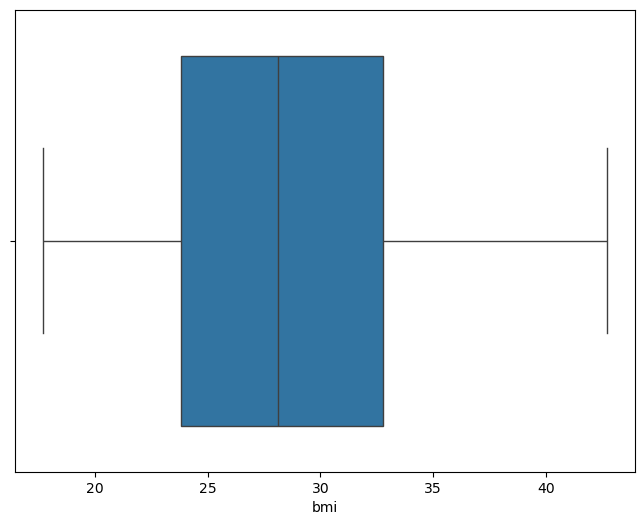

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.bmi)
outliers = [val for val in df.bmi if (val < lower_bound or val > upper_bound) ] 
print("avg_glucose_level doesn't have outliers") if len(outliers)==0 else print(f"avg_glucose_level has {len(outliers)} outliers ")

In [52]:
# X,Y Train test split
X = df.drop('stroke',axis='columns')
y = testLabels = df.stroke.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [58]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 5.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [59]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, input_dim, label_dim, output_dim):
        super(Generator, self).__init__()
        self.label_embed = nn.Embedding(label_dim, label_dim)
        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_input = self.label_embed(labels)
        gen_input = torch.cat((noise, label_input), -1)
        return self.model(gen_input)

class Discriminator(nn.Module):
    def __init__(self, output_dim, label_dim):
        super(Discriminator, self).__init__()
        self.label_embed = nn.Embedding(label_dim, label_dim)
        self.model = nn.Sequential(
            nn.Linear(output_dim + label_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, data, labels):
        label_input = self.label_embed(labels)
        disc_input = torch.cat((data, label_input), -1)
        return self.model(disc_input)


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# ตรวจสอบและแปลงข้อมูลที่เป็น categorical ให้เป็นตัวเลข
X_train = pd.get_dummies(X_train)  # แปลงข้อมูลที่เป็น string หรือ categorical ให้เป็นตัวเลข
X_test = pd.get_dummies(X_test)

# ตรวจสอบให้แน่ใจว่า X_train และ X_test มีคอลัมน์ที่สอดคล้องกัน
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# แก้ไข missing values ถ้ามี
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Initial parameters
device = torch.device("cpu")  # ใช้ CPU สำหรับการฝึก
input_dim = 100  # Noise dimension
output_dim = X_train.shape[1]  # Adjust to match the number of features
label_dim = 2  # Binary classification

# Create and initialize models
generator = Generator(input_dim, label_dim, output_dim).to(device)
discriminator = Discriminator(output_dim, label_dim).to(device)
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Convert training data to Tensor and DataLoader
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))  # แปลงเป็น float32
y_train_tensor = torch.tensor(y_train.values.astype(np.float32))  # แปลงเป็น float32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Function to train the CSAGAN
def train_gan(data_loader, epochs, generator, discriminator, optimizer_G, optimizer_D, adversarial_loss, device):
    for epoch in range(epochs):
        for i, (real_samples, labels) in enumerate(data_loader):
            real_samples, labels = real_samples.to(device), labels.long().to(device)
            batch_size = real_samples.size(0)

            # Ground truths
            valid = torch.ones((batch_size, 1), requires_grad=False).to(device)
            fake = torch.zeros((batch_size, 1), requires_grad=False).to(device)

            # Train Generator
            optimizer_G.zero_grad()
            z = torch.randn(batch_size, input_dim).to(device)
            gen_labels = torch.randint(0, label_dim, (batch_size,)).long().to(device)
            gen_samples = generator(z, gen_labels)

            validity = discriminator(gen_samples, gen_labels)
            g_loss = adversarial_loss(validity, valid)
            g_loss.backward()
            optimizer_G.step()

            # Train Discriminator
            optimizer_D.zero_grad()
            real_pred = discriminator(real_samples, labels)
            d_real_loss = adversarial_loss(real_pred, valid)

            fake_pred = discriminator(gen_samples.detach(), gen_labels)
            d_fake_loss = adversarial_loss(fake_pred, fake)

            d_loss = (d_real_loss + d_fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")

    return gen_samples  # Return generated samples at the end of training

# Train CSAGAN model and generate synthetic data
epochs = 100  # Number of training epochs
generated_data = train_gan(train_loader, epochs, generator, discriminator, optimizer_G, optimizer_D, adversarial_loss, device)

# Convert the generated data back to numpy array
generated_data = generated_data.detach().cpu().numpy()

# Combine generated data with original training data
X_train_combined = np.vstack((X_train.values, generated_data))  # รวมข้อมูล X_train กับ generated_data
y_train_combined = np.hstack((y_train.values, np.ones(generated_data.shape[0])))  # ตั้งให้ข้อมูลที่สร้างขึ้นเป็น class 1 (สมมติว่ามันมาจาก minority class)


Epoch 0/100 | D Loss: 0.0706484243273735 | G Loss: 2.257260322570801
Epoch 1/100 | D Loss: 0.011117364279925823 | G Loss: 4.325115203857422
Epoch 2/100 | D Loss: 0.004052421078085899 | G Loss: 5.298386096954346
Epoch 3/100 | D Loss: 0.0026131023187190294 | G Loss: 5.725085258483887
Epoch 4/100 | D Loss: 0.001925976132042706 | G Loss: 5.827442169189453
Epoch 5/100 | D Loss: 0.0010978268692269921 | G Loss: 6.486337184906006
Epoch 6/100 | D Loss: 0.0005848646396771073 | G Loss: 7.242724418640137
Epoch 7/100 | D Loss: 0.0005761811044067144 | G Loss: 7.102583408355713
Epoch 8/100 | D Loss: 0.0003603049262892455 | G Loss: 7.664567947387695
Epoch 9/100 | D Loss: 0.0002761023642960936 | G Loss: 7.909163951873779
Epoch 10/100 | D Loss: 0.00023334225988946855 | G Loss: 8.086410522460938
Epoch 11/100 | D Loss: 0.0002073931973427534 | G Loss: 8.158733367919922
Epoch 12/100 | D Loss: 0.00014196957636158913 | G Loss: 8.53982162475586
Epoch 13/100 | D Loss: 0.00013179979578126222 | G Loss: 8.65616226

In [64]:
X_train_combined.shape

(3602, 17)

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
# Prepare function for model evaluation
def evaluate_model(model_name, y_val, y_pred, y_prob):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, precision, recall, auc

Confusion Matrix:
[[959   1]
 [ 59   3]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.75      0.05      0.09        62

    accuracy                           0.94      1022
   macro avg       0.85      0.52      0.53      1022
weighted avg       0.93      0.94      0.92      1022

Accuracy: 0.9413
Precision: 0.7500
Recall: 0.0484
AUC: 0.8162


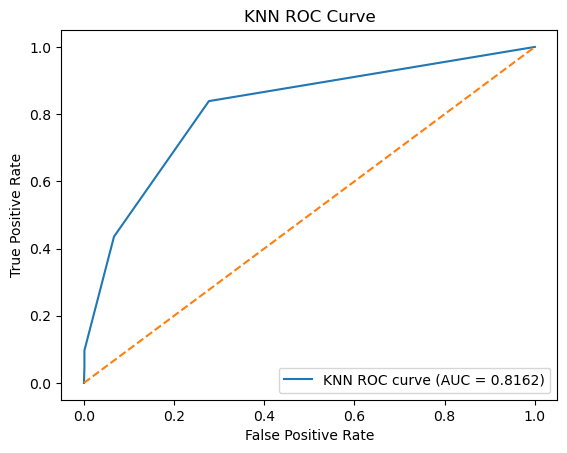

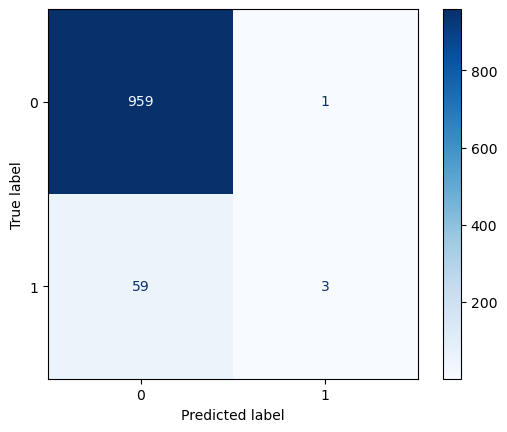

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9,],       # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step to scale the data
    ('knn', KNeighborsClassifier())          # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_train_combined, y_train_combined)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)

Confusion Matrix:
[[960   0]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Accuracy: 0.9393
Precision: 0.0000
Recall: 0.0000
AUC: 0.5622


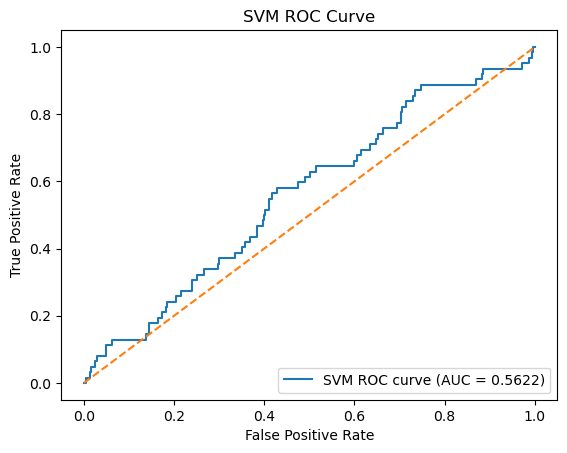

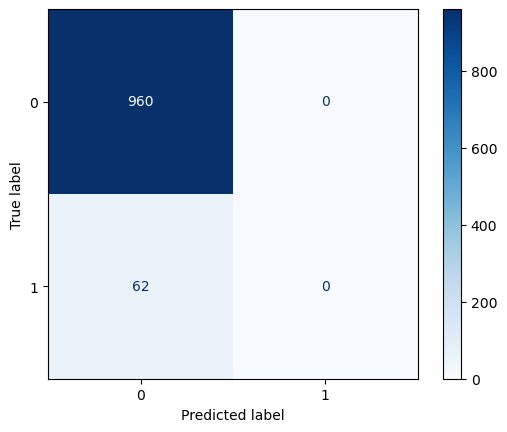

Best parameters found by GridSearchCV:
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_combined, y_train_combined)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[858 102]
 [ 34  28]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93       960
         1.0       0.22      0.45      0.29        62

    accuracy                           0.87      1022
   macro avg       0.59      0.67      0.61      1022
weighted avg       0.92      0.87      0.89      1022

Accuracy: 0.8669
Precision: 0.2154
Recall: 0.4516
AUC: 0.8054


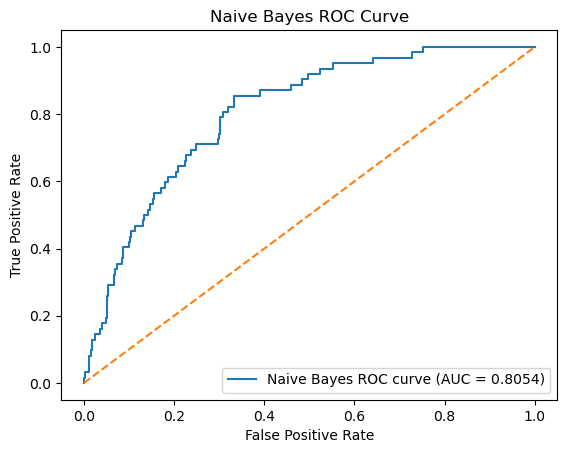

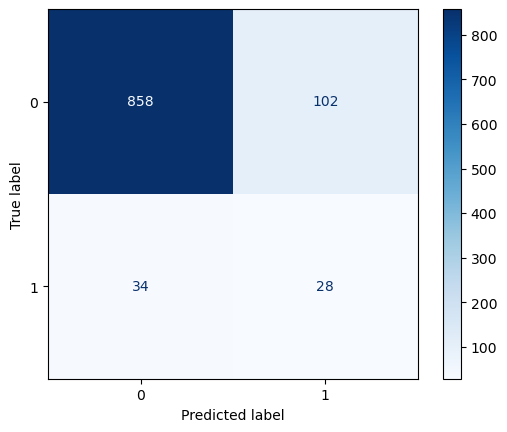

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train_combined, y_train_combined)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()
